In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

# Bar Chart

           Brand  Cars Listings
2  Mercedes-Benz            820
1            BMW            636
0           Audi            419
6     Volkswagen            875
4        Renault            438


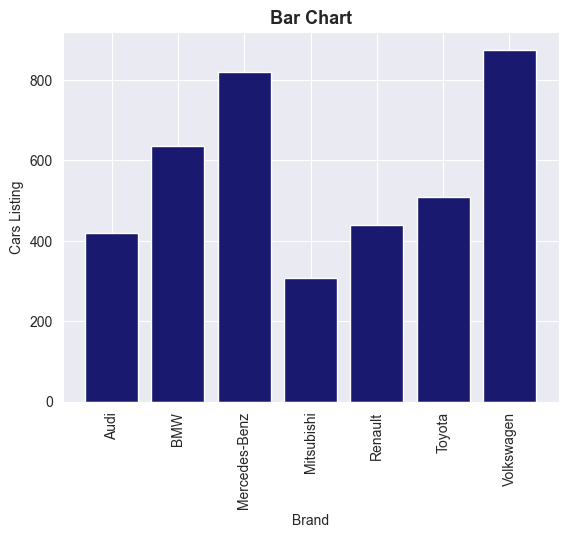

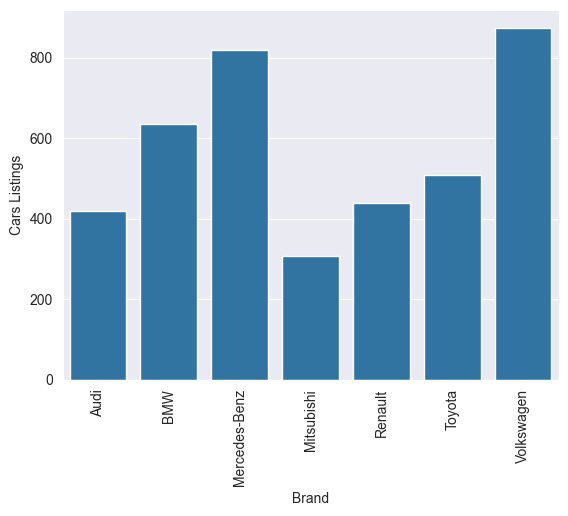

In [2]:
df = pd.read_csv('./assets/bar_chart_data.csv')
print(df.sample(5).to_string())

plt.bar(
    x=df.Brand,
    height=df['Cars Listings'],
    color="midnightblue" #r,g,b,w,y,m,c
)
plt.xlabel("Brand")
plt.xticks(rotation=90)
plt.ylabel("Cars Listing")
plt.title("Bar Chart",fontsize=13,fontweight="bold")
plt.show()


sns.barplot(
    data=df,
    x='Brand',
    y='Cars Listings',
    # hue =
)
plt.xticks(rotation=90)
plt.show()

# Pie chart

  Engine Fuel Type  Number of Cars
1              Gas             613
2            Other             154
3           Petrol            1559


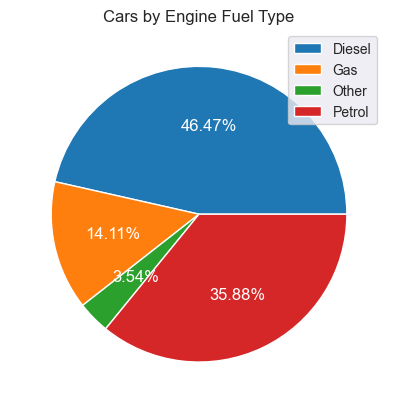

In [3]:
df = pd.read_csv("./assets/pie_chart_data.csv")
print(df.sample(3).to_string())

plt.pie(
    x=df['Number of Cars'],
    labels=df['Engine Fuel Type'].values,
    autopct="%.2f%%", # 2 decimal
    textprops = {
        "size":"large",
        "fontweight":"20",
        'rotation':'horizontal',
        'color':'w'
    }
)
plt.legend(loc="best");
plt.title("Cars by Engine Fuel Type")
plt.show()



# Stacked Area Chart

    Year   Gas  Petrol  Diesel  Other
32  2014   409    1942    4703    329
24  2006  6439   12372   18024   1878
4   1986   511     681    1066    340


<Figure size 640x480 with 0 Axes>

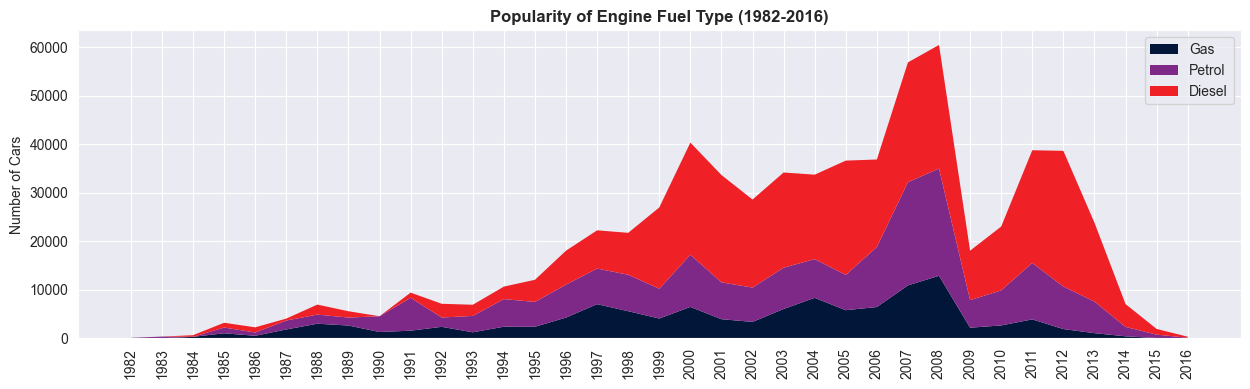

In [4]:
df = pd.read_csv("./assets/stacked_area_chart_data.csv")
print(df.sample(3).to_string())

# remove border
sns.despine(left=True)

plt.figure(figsize=(15,4))
labels = df.drop(['Year','Other'],axis=1).columns
colors = ['#011638','#7e2987','#ef2026']
plt.stackplot(df['Year'], # X-axis

    # stacking parameters
    df['Gas'], 
    df['Petrol'],
    df['Diesel'],
    colors=colors,
    edgecolor="none",
    labels=labels
)

plt.ylabel("Number of Cars",fontsize=10)
plt.title("Popularity of Engine Fuel Type (1982-2016)",weight="bold",fontsize=12)
plt.xticks(df['Year'],rotation=90)
plt.legend()
plt.show()

# Line Plot

        Date   GSPC500   FTSE100
0 2000-01-03  0.003264  0.000000
1 2000-01-04 -0.009549  0.000000
2 2000-01-05 -0.038345 -0.038137


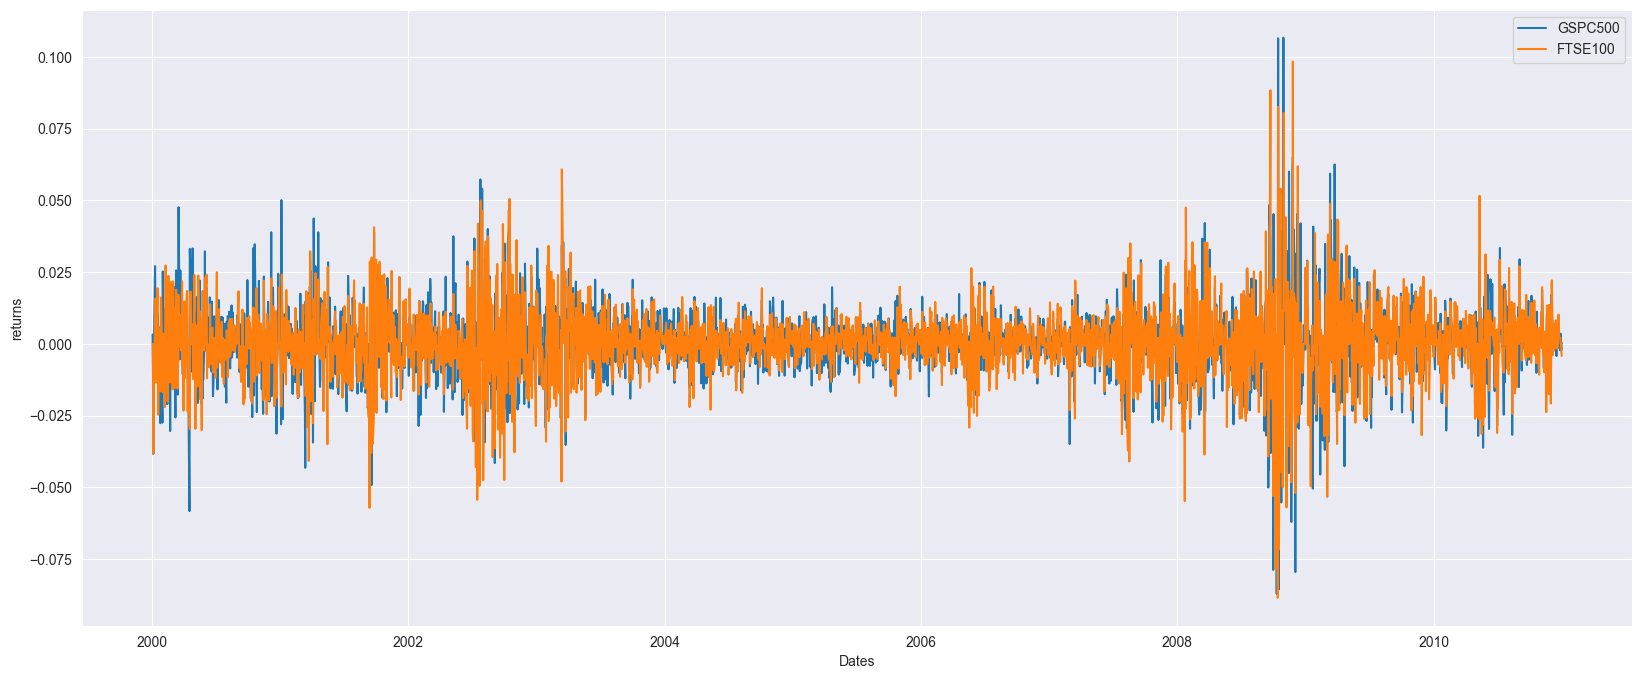

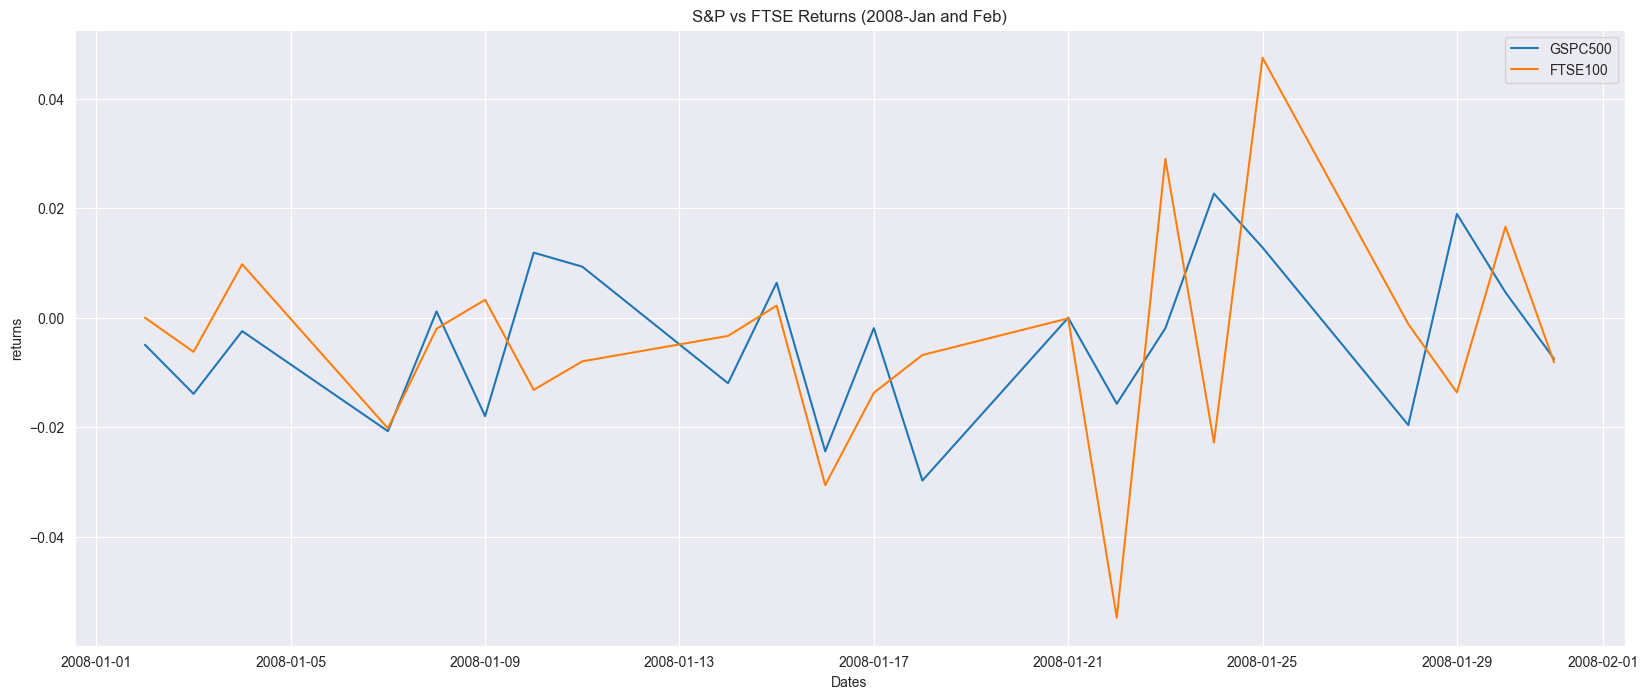

In [5]:
df = pd.read_csv("./assets/line_chart_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
print(df.head(3).to_string())

plt.figure(figsize=(20,8))
plt.plot(df['Date'],df['GSPC500'],label="GSPC500")
plt.plot(df['Date'],df['FTSE100'],label="FTSE100")
plt.legend()
plt.ylabel("returns"); plt.xlabel("Dates")
plt.show()



df_new  = df.loc[(
    (df.Date >'2008-01-01')
    &
    (df.Date<'2008-02-01')
)]

plt.figure(figsize=(20,8))
plt.plot(df_new['Date'],df_new['GSPC500'],label="GSPC500")
plt.plot(df_new['Date'],df_new['FTSE100'],label="FTSE100")
plt.legend()
plt.ylabel("returns"); plt.xlabel("Dates")
plt.title("S&P vs FTSE Returns (2008-Jan and Feb)")
plt.show()

# Histogram

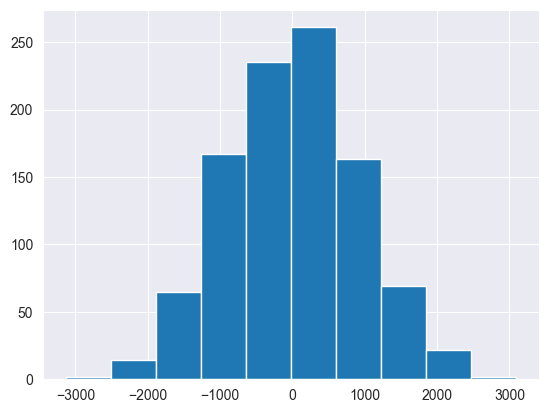

In [6]:
l = np.random.randn(1000)*912

plt.hist(l)
plt.show()   # Y-scale explode

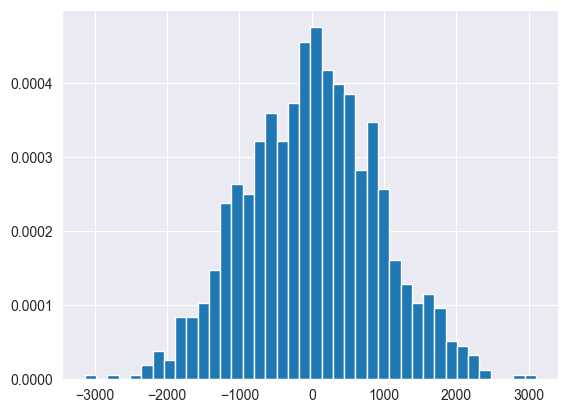

In [7]:
plt.hist(l,bins=40,density=True)   
plt.show()                          # Area under curve=1

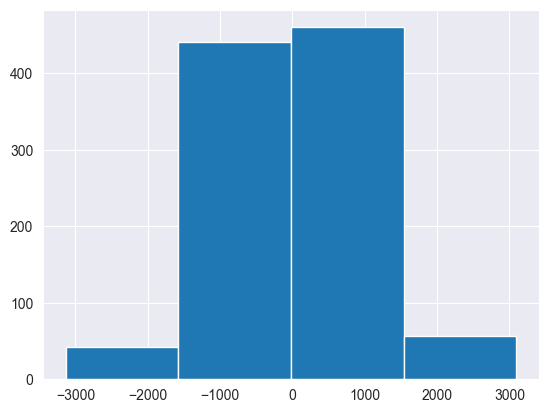

In [8]:
# Be aware of BINS
plt.hist(l,bins=4)   
plt.show()       

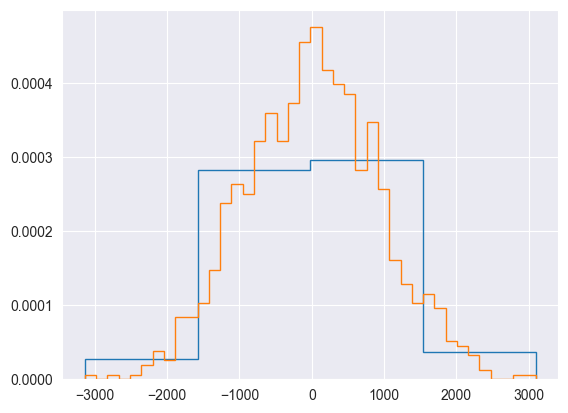

In [9]:
plt.hist(l,bins=4,histtype="step",density=True)   
plt.hist(l,bins=40,histtype="step",density=True)   
plt.show()

# Multi Plot

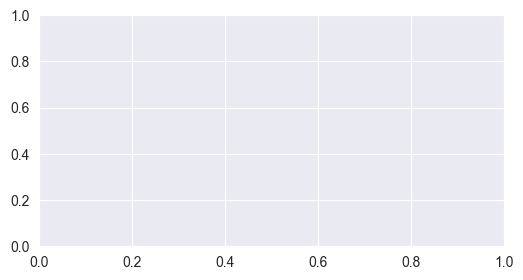

In [10]:
fig,ax = plt.subplots(1,1,figsize=(6,3))

ax: [<Axes: > <Axes: >] and it's shape:2


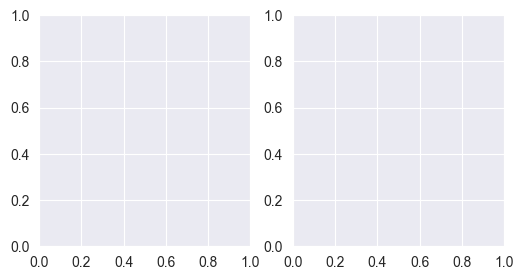

In [11]:
fig,ax = plt.subplots(1,2,figsize=(6,3))
print(f"ax: {ax} and it's shape:{len(ax)}")
plt.show()

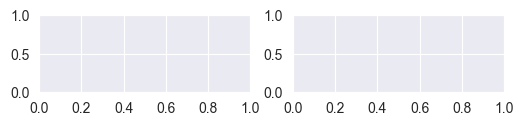

In [12]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(6,1))

# Scatter Plot

       ID  Building Type  Year of sale  Month of sale Type of property  Property #  Area (ft.)      Price    Status
97   2024              2        2005.0            6.0        Apartment          24     1604.75  456.91946     Sold 
252  5025              5           NaN            NaN        Apartment          25      618.16  199.73073  Not Sold
207  3029              3           NaN            NaN        Apartment          29     1121.95  388.65681  Not Sold


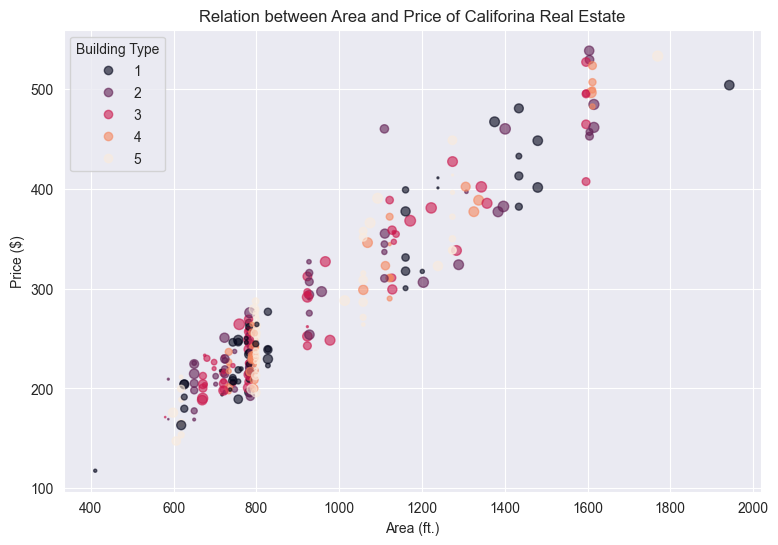

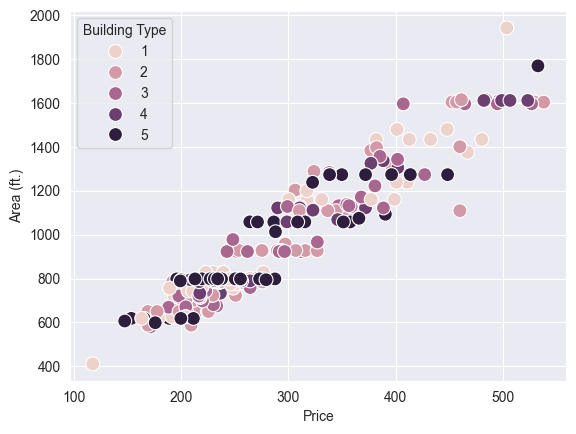

In [13]:
df = pd.read_csv('./assets/scatter_data.csv')
print(df.sample(3).to_string())

plt.figure(figsize=(9,6))
scatter = plt.scatter(
    x=df['Area (ft.)'],
    y=df['Price'],
    alpha=0.6,                  # alpha = transperency
    c =df['Building Type'], # color
    s = df['Property #']  # size
)
plt.legend(*scatter.legend_elements(),title="Building Type")
plt.title("Relation between Area and Price of Califorina Real Estate")
plt.xlabel("Area (ft.)")
plt.ylabel("Price ($)")
plt.show()


sns.scatterplot(
    x= df['Price'],
    y = df["Area (ft.)"],
    hue=df["Building Type"],
    s=100
)
plt.show()

# Box Plot

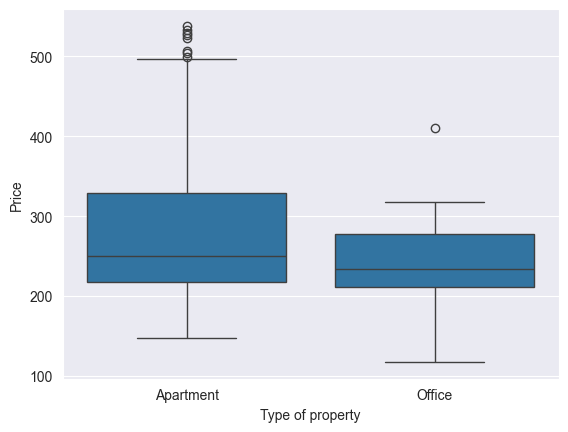

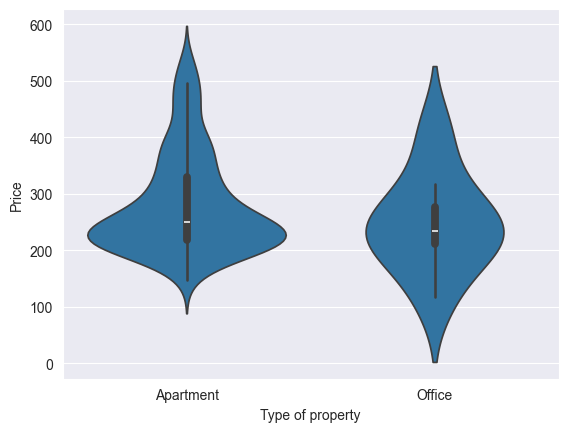

In [14]:
sns.boxplot(data=df,x="Type of property",y="Price")
plt.show()


sns.violinplot(data=df,x="Type of property",y="Price")
plt.show()

# Reg Plot

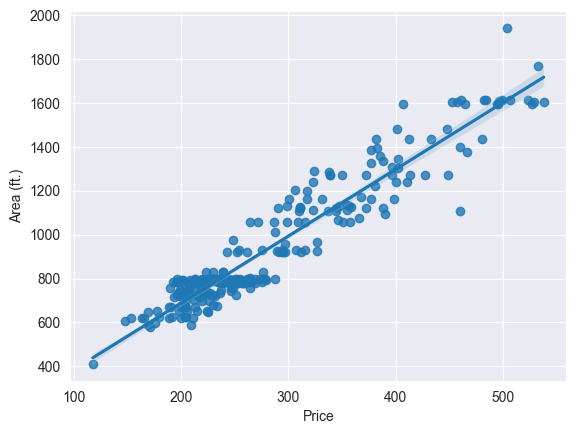

In [15]:
sns.regplot(data=df,x="Price",y='Area (ft.)');
plt.show()

# `note:` Positive correlation here

# Contour Plots

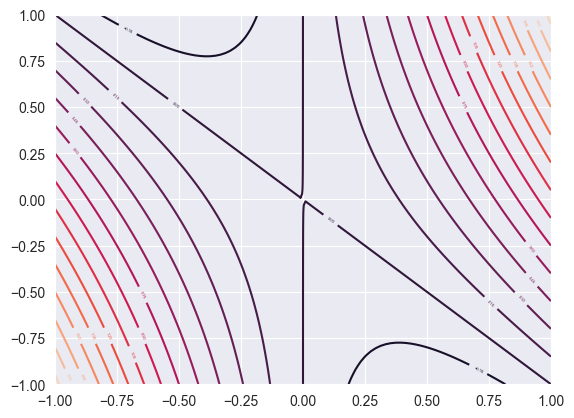

In [16]:
_ = np.linspace(-1,1,100)
x,y = np.meshgrid(_,_)
z = x**2+x*y

cs = plt.contour(x,y,z,levels=20);
plt.clabel(cs,fontsize=3)
plt.show()

# Spyder Chart

  group  var1  var2  var3  var4  var5
0     A  38.0    29     8     7    28
1     B   1.5    10    39    31    15
2     C  30.0     9    23    33    32
3     D   4.0    34    24    14    14
categories:['var1', 'var2', 'var3', 'var4', 'var5'] and N=5 and 
values=[38.0, 29, 8, 7, 28, 38.0]  and 
angles=[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]


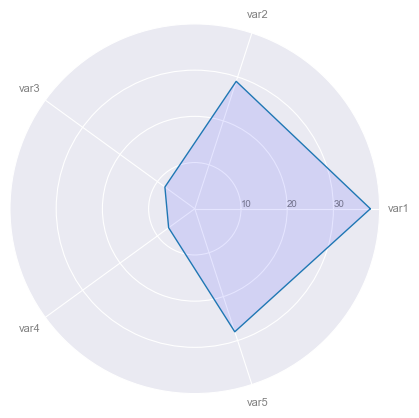

In [17]:
from math import pi
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})

print(df.to_string())

categories=list(df)[1:]
N = len(categories)
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


print(f"categories:{categories} and N={N} and \nvalues={values}  and \nangles={angles}")

ax = plt.subplot(111, polar=True) 
plt.xticks(angles[:-1], categories, color='grey', size=8) 
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)  
plt.show()

# Data Analysis is an ART - we should appreciate

credits: https://www.python-graph-gallery.com/